In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('liver.csv')

In [18]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

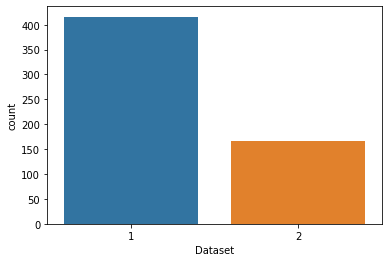

In [7]:
sns.countplot(x='Dataset',data=df)

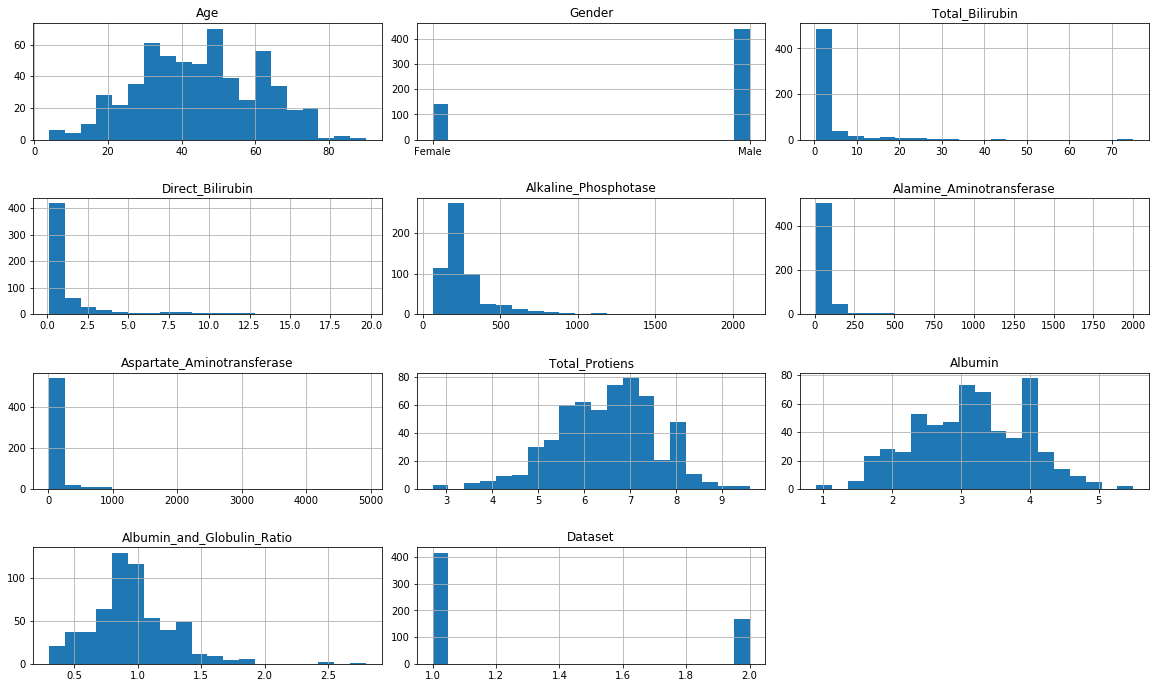

In [9]:
import itertools
col = df.columns[:11]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

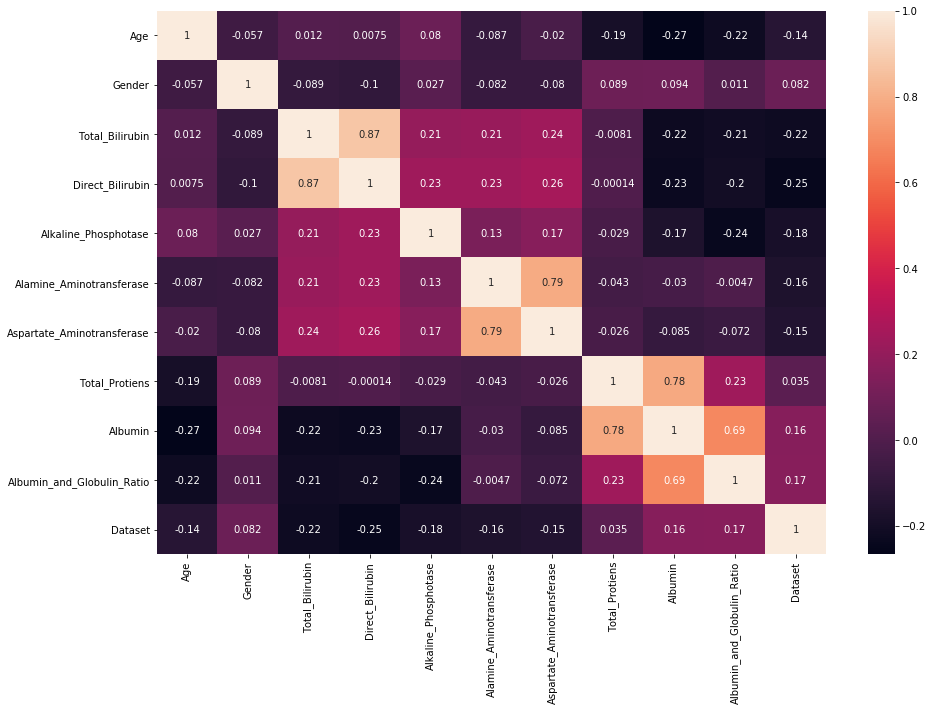

In [15]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

In [12]:
df["Albumin_and_Globulin_Ratio"]=df["Albumin_and_Globulin_Ratio"].bfill()

In [14]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

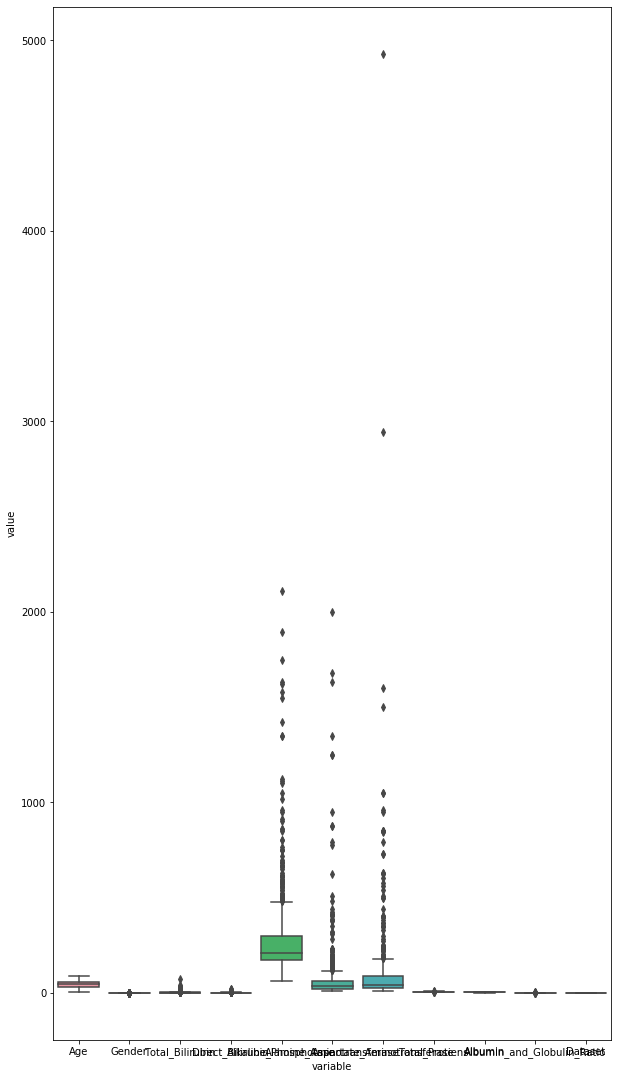

In [17]:
plt.figure(figsize=(10,19))
sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns[:]]))
plt.show()

In [19]:
y=df['Dataset']
X=df.drop(['Dataset'],axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()

In [28]:
classifiers = [('Decision Tree Classifier', dc),
              ('Random Forest Classifier', rc),
              ('KNeighbors Classifier', knnc),
             ('Ada Boost Classifier', abc),
             ('Gradient Boosting Classifier', gbc)]

In [29]:
for reg_name, reg in classifiers:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = y_pred.reshape(-1,1)
    print(reg_name, accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.6164383561643836
Random Forest Classifier 0.7054794520547946
KNeighbors Classifier 0.636986301369863
Ada Boost Classifier 0.6643835616438356
Gradient Boosting Classifier 0.6712328767123288


In [30]:
import pickle

In [31]:
liver_model = "liver_model.pkl"  
with open(liver_model, 'wb') as file:  
    pickle.dump(rc, file)